In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
credit_df= pd.read_csv(r"C:\Prosenjeet Shil\sem2 practicals\AIML lab\CreditRisk.csv")

In [7]:
credit_df.shape

(614, 13)

In [9]:
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [11]:
credit_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360.0,0.0,Semiurban,0


In [13]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [15]:
credit_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [17]:
credit_df.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [19]:
credit_df.groupby(['Education','Loan_Status']).Education.count()

Education     Loan_Status
Graduate      0              140
              1              340
Not Graduate  0               52
              1               82
Name: Education, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

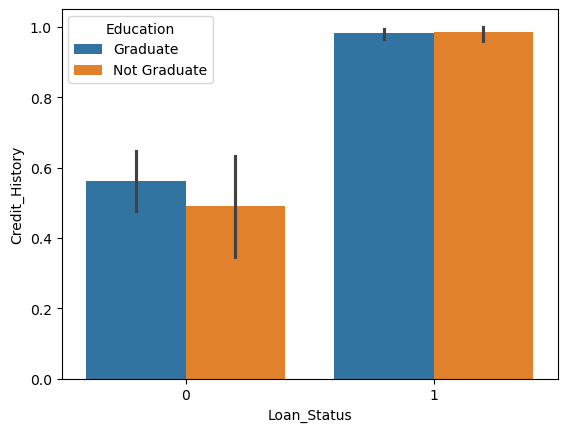

In [21]:
sns.barplot(y='Credit_History',x='Loan_Status',hue='Education',data=credit_df)

In [23]:
100*credit_df.isnull().sum()/credit_df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [25]:
DF=credit_df.drop(credit_df.columns[0],axis=1)

In [27]:
DF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [29]:
object_columns=DF.select_dtypes(include=['object']).columns
numeric_columns=DF.select_dtypes(exclude=['object']).columns

In [31]:
for column in object_columns:
    majority=DF[column].value_counts().iloc[0]
    DF[column].fillna(majority,inplace=True)

C:\Users\prose\AppData\Local\Temp\ipykernel_12836\4116804613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF[column].fillna(majority,inplace=True)
C:\Users\prose\AppData\Local\Temp\ipykernel_12836\4116804613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [33]:
for column in numeric_columns:
    mean=DF[column].mean()
    DF[column].fillna(mean,inplace=True)

C:\Users\prose\AppData\Local\Temp\ipykernel_12836\2629808443.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF[column].fillna(mean,inplace=True)


In [35]:
DF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [37]:
DF[object_columns].Property_Area

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [39]:
DF_dummy=pd.get_dummies(DF,columns=object_columns)

In [41]:
DF_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_489,Gender_Female,Gender_Male,Married_398,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_500,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,360.0,1.0,1,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
1,4583,1508.0,128,360.0,1.0,0,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,3000,0.0,66,360.0,1.0,1,False,False,True,False,...,False,False,True,False,False,False,True,False,False,True
3,2583,2358.0,120,360.0,1.0,1,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True
4,6000,0.0,141,360.0,1.0,1,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True


In [43]:
DF_dummy.shape

(614, 25)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
X=DF_dummy.drop('Loan_Status',axis=1)
y=DF_dummy.Loan_Status
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
train_X.shape,test_X.shape

((429, 24), (185, 24))

In [51]:
model=LogisticRegression()

In [53]:
model.fit(train_X,train_y)

C:\Users\prose\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
train_y_hat=model.predict(train_X)
test_y_hat=model.predict(test_X)

In [57]:
print('train accuracy',accuracy_score(train_y,train_y_hat))
print('test accuracy',accuracy_score(test_y,test_y_hat))

train accuracy 0.8205128205128205
test accuracy 0.7837837837837838


In [59]:
print(confusion_matrix(train_y,train_y_hat))

[[ 57  70]
 [  7 295]]


In [61]:
print(confusion_matrix(test_y,test_y_hat))

[[ 27  38]
 [  2 118]]


In [63]:
test_y.value_counts()

Loan_Status
1    120
0     65
Name: count, dtype: int64

In [65]:
pd.Series(test_y_hat).value_counts()

1    156
0     29
Name: count, dtype: int64

In [67]:
# Accuracy for train
(57+295)/train_y.shape[0]

0.8205128205128205

In [69]:
print(classification_report(test_y,test_y_hat))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



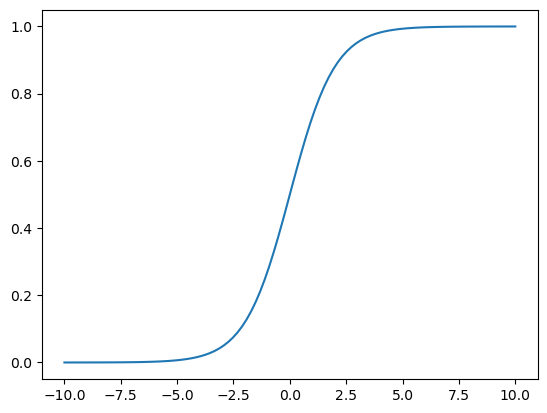

In [71]:
X=np.linspace(-10,10,100)
y=1/(1+np.exp(-X))# sigmoid
plt.plot(X,y)

In [73]:
test_y_hat_5=(model.predict_proba(test_X)[:,1]>0.5).astype(int)
test_y_hat_7=(model.predict_proba(test_X)[:,1]>0.7).astype(int)
test_y_hat_3=(model.predict_proba(test_X)[:,1]>0.3).astype(int)

In [75]:
print(confusion_matrix(test_y,test_y_hat_5))
print(confusion_matrix(test_y,test_y_hat_7))
print(confusion_matrix(test_y,test_y_hat_3))

[[ 27  38]
 [  2 118]]
[[39 26]
 [27 93]]
[[ 15  50]
 [  1 119]]


In [77]:
print(classification_report(test_y,test_y_hat_5))
print(classification_report(test_y,test_y_hat_7))
print(classification_report(test_y,test_y_hat_3))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

              precision    recall  f1-score   support

           0       0.59      0.60      0.60        65
           1       0.78      0.78      0.78       120

    accuracy                           0.71       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.71      0.71      0.71       185

              precision    recall  f1-score   support

           0       0.94      0.23      0.37        65
           1       0.70      0.99      0.82       120

    accuracy                           0.72       185
   macro avg       0.82      0.61      0.60       185
weighted avg       0.79      0.72      0.66       185



In [83]:
from sklearn.svm import SVC

In [85]:
svm_model = SVC(kernel='rbf', gamma=0.00001, C=1000)

In [93]:
svm_model.fit(train_X, train_y)

SVC(C=1000, gamma=1e-05)

In [95]:
train_y_hat = svm_model.predict(train_X) 
test_y_hat = svm_model.predict(test_X)

In [97]:
print('-'*20, 'Train', '-'*20) 
print(classification_report(train_y, train_y_hat)) 
print('-'*20, 'Test', '-'*20) 
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       127
           1       0.98      0.98      0.98       302

    accuracy                           0.97       429
   macro avg       0.96      0.96      0.96       429
weighted avg       0.97      0.97      0.97       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.36      0.18      0.24        65
           1       0.65      0.82      0.73       120

    accuracy                           0.60       185
   macro avg       0.51      0.50      0.49       185
weighted avg       0.55      0.60      0.56       185



In [99]:
confusion_matrix(test_y, test_y_hat)

array([[12, 53],
       [21, 99]], dtype=int64)